In [226]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

## Step 1: Data acquisition ##

*---- [start] Code taken from course wiki ----*

In [227]:
import json
import requests

In [228]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [229]:
# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/winnawat',
    'From': 'nawats@uw.edu'
}

In [230]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [231]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [232]:
example_monthly_legacy = api_call(endpoint_legacy, example_params_legacy)

*---- [end]Code taken from course wiki ----*

Taking a quick look at the format of the JSON objects generated.

In [233]:
for i in range(0,4):
    sampleitem = random.sample(list(example_monthly_legacy.items())[0][1], 1)
    print (sampleitem)

[{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2015040100', 'count': 6198945657}]
[{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2008120100', 'count': 5211708451}]
[{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2016020100', 'count': 5347709361}]
[{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2009110100', 'count': 5768486910}]


In [234]:
for i in range(0,4):
    sampleitem = random.sample(list(example_monthly_pageviews.items())[0][1], 1)
    print (sampleitem)

[{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015120100', 'views': 4100012037}]
[{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2018020100', 'views': 3634653694}]
[{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015090100', 'views': 4485491704}]
[{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2017080100', 'views': 3575572313}]


Setting up the parameters of the API calls.

In [235]:
params_legacy_desktop = {"project" : "en.wikipedia.org",
                         "access-site" : "desktop-site",
                         "granularity" : "monthly",
                         "start" : "2001010100",
                         # for end use 1st day of month following final month of data
                         "end" : "2019090100"
                        }
params_legacy_mobile = {"project" : "en.wikipedia.org",
                        "access-site" : "mobile-site",
                        "granularity" : "monthly",
                        "start" : "2001010100",
                        # for end use 1st day of month following final month of data
                        "end" : "2019090100"
                       }
params_pageviews_desktop = {"project" : "en.wikipedia.org",
                            "access" : "desktop",
                            "agent" : "user",
                            "granularity" : "monthly",
                            "start" : "2001010100",
                            # for end use 1st day of month following final month of data
                            "end" : '2019091000'
                           }
params_pageviews_mobileweb = {"project" : "en.wikipedia.org",
                            "access" : "mobile-web",
                            "agent" : "user",
                            "granularity" : "monthly",
                            "start" : "2001010100",
                            # for end use 1st day of month following final month of data
                            "end" : '2019091000'
                           }
params_pageviews_mobileapp = {"project" : "en.wikipedia.org",
                            "access" : "mobile-app",
                            "agent" : "user",
                            "granularity" : "monthly",
                            "start" : "2001010100",
                            # for end use 1st day of month following final month of data
                            "end" : '2019091000'
                           }

Making the API calls.

In [236]:
pagecount_desktop = api_call(endpoint_legacy, params_legacy_desktop)
pagecount_mobile = api_call(endpoint_legacy, params_legacy_mobile)
pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)
pageviews_mobileweb = api_call(endpoint_pageviews, params_pageviews_mobileweb)
pageviews_mobileapp = api_call(endpoint_pageviews, params_pageviews_mobileapp)

Saving the data collected as JSON files

In [237]:
with open("pagecounts_desktop-site_200712-201909.json", 'w') as fp:
    json.dump(pagecount_desktop['items'], fp)
with open("pagecounts_mobile-site_200712-201909.json", 'w') as fp:
    json.dump(pagecount_mobile['items'], fp)
with open("pageview_desktop_200712-201909.json", 'w') as fp:
    json.dump(pageviews_desktop['items'], fp)
with open("pageview_mobile-web_200712-201909.json", 'w') as fp:
    json.dump(pageviews_mobileweb['items'], fp)
with open("pageview_mobile-app_200712-201909.json", 'w') as fp:
    json.dump(pageviews_mobileapp['items'], fp)

(lifted from the course wiki)

#### Required deliverables ####
A directory in your GitHub repository called data-512-a1 that contains the following files:

- 5 source data files in JSON format that follow the specified naming convention.
    - `apiname_accesstype_firstmonth-lastmonth.json`
    - `pagecounts_desktop-site_200712-201909.json`
    - `pagecounts_mobile-site_200712-201909.json`
    - `pageview_desktop_200712-201908.json`
    - `pageview_mobile-web_200712-201908.json`
    - `pageview_mobile-app_200712-201908.json`
- 1 final data file in CSV format that follows the specified naming convention.
    - `en-wikipedia_traffic_200712-201809.csv`
- 1 Jupyter notebook named `hcds-a1-data-curation` that contains all code as well as information necessary to understand each programming step.
- 1 README file in .txt or .md format that contains information to reproduce the analysis, including data descriptions, attributions and provenance information, and descriptions of all relevant resources and documentation (inside and outside the repo) and hyperlinks to those resources.
- 1 LICENSE file that contains an MIT LICENSE for your code.
- 1 .png or .jpeg image of your visualization.

## Step 2: Data processing ##

Writing a function to format the timestamp properly. Extracting only month and year, and removing extra zeroes at the end of the timestamp number.

In [238]:
def formatdatetime(df):
    df['timestamp'] = df.timestamp.astype('int').astype('str').str[:8]
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df["month"] = df["timestamp"].map(lambda x: x.month)
    df["year"] = df["timestamp"].map(lambda x: x.year)
    return df

Reading the JSON files generated, format the timestamp column and generate month and year columns

In [239]:
pc_desktop = pd.read_json("pagecounts_desktop-site_200712-201909.json")
pc_mobile = pd.read_json("pagecounts_mobile-site_200712-201909.json")
pv_desktop = pd.read_json("pageview_desktop_200712-201909.json")
pv_mobileweb = pd.read_json("pageview_mobile-web_200712-201909.json")
pv_mobileapp = pd.read_json("pageview_mobile-app_200712-201909.json")

pc_desktop = formatdatetime(pc_desktop)
pc_mobile = formatdatetime(pc_mobile)
pv_desktop = formatdatetime(pv_desktop)
pv_mobileweb = formatdatetime(pv_mobileweb)
pv_mobileapp = formatdatetime(pv_mobileapp)

Aggregating(sum) the data according to month and year for 5 JSON files read above.

In [240]:
pc_desktop_agg = pd.DataFrame(pc_desktop.groupby(["year", "month"])["count"].sum())
pc_desktop_agg.reset_index(inplace=True)
pc_desktop_agg.rename(columns={"count":"pagecount_desktop_views"}, inplace=True)
pc_mobile_agg = pd.DataFrame(pc_mobile.groupby(["year", "month"])["count"].sum())
pc_mobile_agg.reset_index(inplace=True)
pc_mobile_agg.rename(columns={"count":"pagecount_mobile_views"},inplace=True)

pv_desktop_agg = pd.DataFrame(pv_desktop.groupby(["year", "month"])["views"].sum())
pv_desktop_agg.reset_index(inplace=True)
pv_desktop_agg.rename(columns={"views":"pageview_desktop_views"},inplace=True)
pv_mobileweb_agg = pd.DataFrame(pv_mobileweb.groupby(["year", "month"])["views"].sum())
pv_mobileweb_agg.reset_index(inplace=True)
pv_mobileapp_agg = pd.DataFrame(pv_mobileapp.groupby(["year", "month"])["views"].sum())
pv_mobileapp_agg.reset_index(inplace=True)

For pageviews, mobile data comes in two files, app and web. In this analysis, we treat both types of views as mobile views. Therefore, they have to be combined.

In [241]:
pv_mobile_agg = pv_mobileweb_agg
pv_mobile_agg["views"] = pv_mobile_agg["views"] + pv_mobileapp_agg["views"]
pv_mobile_agg.rename(columns={"views":"pageview_mobile_views"},inplace=True)

Merging all the 5 aggregated files into one final CSV file.
Also, the missing data are replaced with 0.
Since the page view values are in the scale of millions, their counts are divided by 1,000,000 for easier representation.

In [242]:
final_csv = pd.merge(pc_desktop_agg, pc_mobile_agg, on=(["year", "month"]), how='outer')
final_csv = pd.merge(final_csv, pv_desktop_agg, on=(["year", "month"]), how='outer')
final_csv = pd.merge(final_csv, pv_mobile_agg, on=(["year", "month"]), how='outer')
final_csv["pagecount_all_views"] = final_csv["pagecount_desktop_views"].fillna(0) + final_csv["pagecount_mobile_views"].fillna(0)
final_csv["pageview_all_views"] = final_csv["pageview_desktop_views"].fillna(0) + final_csv["pageview_mobile_views"].fillna(0)
final_csv = final_csv.fillna(0)
final_csv['pagecount_desktop_views'] = final_csv['pagecount_desktop_views']/1000000
final_csv['pagecount_mobile_views'] = final_csv['pagecount_mobile_views']/1000000
final_csv['pageview_desktop_views'] = final_csv['pageview_desktop_views']/1000000
final_csv['pageview_mobile_views'] = final_csv['pageview_mobile_views']/1000000
final_csv['pagecount_all_views'] = final_csv['pagecount_all_views']/1000000
final_csv['pageview_all_views'] = final_csv['pageview_all_views']/1000000

In [243]:
# final_csv

Saving the CSV file.

In [244]:
final_csv.to_csv("en-wikipedia_traffic_200712-201908.csv")

## Step 3: Analysis ##

In order to plot the views by month, we have to combine the year and month into one single date time column. Zeroes will also cause erranous visualizaiton, so they are replaced with NaN.

In [245]:
final_csv["date"] = pd.to_datetime(final_csv[["year", "month"]].assign(Day=1))
final_csv.replace(0, np.nan, inplace=True)

Plotting the data, show the plot and save to PNG file.

/usr/lib/python3/dist-packages/matplotlib/legend.py:588: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc28aa72160> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/lib/python3/dist-packages/matplotlib/legend.py:588: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc28a1450b8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/lib/python3/dist-packages/matplotlib/legend.py:588: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc28ece8e10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


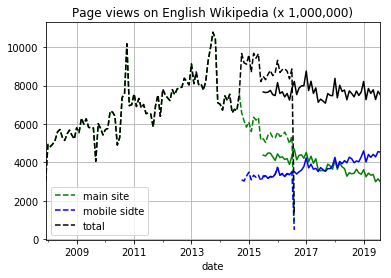

In [253]:
ax = plt.gca()

final_csv.plot(kind='line',x='date',y='pagecount_desktop_views', color='green', linestyle='--', label="main site", ax=ax)
final_csv.plot(kind='line',x='date',y='pagecount_mobile_views', color='blue', linestyle='--', label="mobile sidte", ax=ax)
final_csv.plot(kind='line',x='date',y='pageview_desktop_views', color='green', label='_nolegend_', ax=ax)
final_csv.plot(kind='line',x='date',y='pageview_mobile_views', color='blue', label='_nolegend_', ax=ax)
final_csv.plot(kind='line',x='date',y='pagecount_all_views', color='black', linestyle='--', label="total", ax=ax)
final_csv.plot(kind='line',x='date',y='pageview_all_views', color='black', label='_nolegend_', ax=ax)
plt.grid()
plt.title("Page views on English Wikipedia (x 1,000,000)")
plt.savefig("visualization.png")
plt.show()